On propose ici une version simplifiée type pour l'animation du pendule.

**La première cellule de code** calcule les trajectoires des pendules comme effectué en TP et les stocke dans 4 vecteurs numpy : $(x_1,y_1)$ sont les coordonnées du premier pendule et $(x_2, y_2)$ sont les coordonnées du second pendule.

**La seconde cellule de code** donne un exemple concis d'animation.

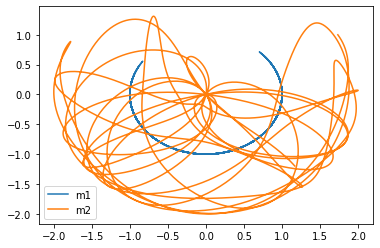

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Point Milieu

def pointMilieuMultiD(fun, t0, T, y0, h):

    """ fun est le second membre de l'equation y' = fun(t,y)
        [t0,t0+T] est l'intervalle de temps sur lequel on resout
        y0 est un numpy array : c'est la condition initiale y(t0)=y0
        h est le pas de temps"""
    """euler renvoie
        * tps un numpy array contenant la discretisation de l'intervalle de temps
        * sol un numpy ndarray de taille (tps.size, y0.size) """
        
    tps = np.arange(t0, t0+T+h, h)
    d = y0.size # 
    N = tps.size
    sol = np.zeros((N, d)) #
    sol[0]=y0
    for i in range(N-1):
        p1 = fun(tps[i],sol[i])
        sol[i+1] = sol[i] + h*fun(tps[i]+0.5*h, sol[i]+0.5*h*p1)
    
    return [tps, sol]

# parametres
g = 9.80665
l1 = 1.
l2 = 1.
m1 = 2.
m2 =1.
    
# second membre du systeme

def penduleDouble(t,y):
    #y=[theta1,theta2,v1,v2]
    #w=[theta1',theta2',v1',v2']
    y1 = y[0]; y2 = y[1]; y3 = y[2]; y4 = y[3]
    w = np.zeros(4)
    w[0] = y3
    w[1] = y4
    w[2] = ( (-m2)*l1*np.sin(y1-y2)*np.cos(y1-y2)*y3**2 - m2*l2*np.sin(y1-y2)*y4**2 - m1*g*np.sin(y1) - m2*g*np.sin(y1-y2)*np.cos(y2) )/(l1*(m1+m2*np.sin(y1-y2)**2 ))
    w[3] = ( (m1+m2)*l1*np.sin(y1-y2)*y3**2 + m2*l2*np.sin(y1-y2)*np.cos(y1-y2)*y4**2 + (m1+m2)*g*np.sin(y1-y2)*np.cos(y1) )/(l2*( m1+m2*np.sin(y1-y2)**2 ))
    return w    

# coordonnées des masses

def coord1(theta1):
    return l1*np.sin(theta1), -l1*np.cos(theta1)

def coord2(theta1,theta2):
    x2 = l1*np.sin(theta1) + l2*np.sin(theta2) 
    y2 = -l1*np.cos(theta1) - l2*np.cos(theta2) 
    return x2, y2

t0 = 0.
T = 20.
h = 0.005

y0 = np.array([2*np.pi/3, 2*np.pi/3, 0., 0.])
tps, sol = pointMilieuMultiD(penduleDouble, t0, T, y0, h)

theta1 = sol[:, 0]
theta2 = sol[:, 1]
x1, y1 = coord1(theta1)
x2, y2 = coord2(theta1, theta2)

# trajectoires

plt.plot(x1, y1, label='m1')
plt.plot(x2, y2, label='m2')
plt.legend(loc='best')


Les positions des masses sont stockées dans les `np.array x1, y1, x2, y2`.

<IPython.core.display.Javascript object>


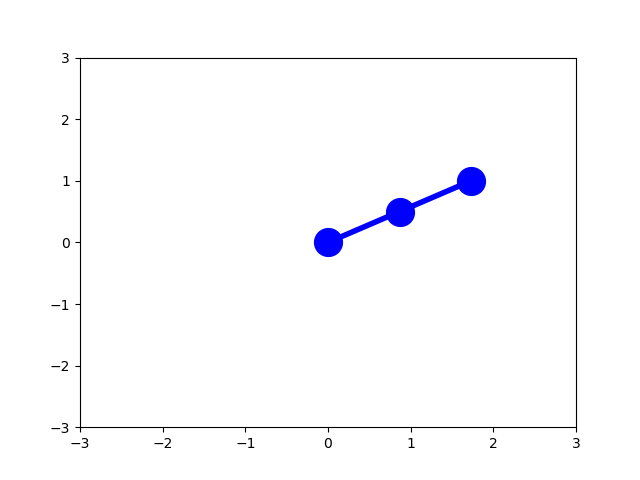

In [2]:
import matplotlib.animation as animation
%matplotlib notebook 
# le mode par defaut est %matplotlib inline en general

fig, ax = plt.subplots()

# On initialise la taille de la fenetre
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# On intialise le pendule en position de depart : deux segments reliant (0,0), (x1, y1), (x2,y2)
line = ax.plot([0, x1[0], x2[0]], [0, y1[0], y2[0]], 'b-o', lw=4, ms = 20)[0]
# ax.plot retourne un tuple, alternative :
#line, = ax.plot([0, x1[0], x2[0]], [0, y1[0], y2[0]], 'b-o', lw=4, ms = 20)

def animate_point(i):
    ax.clear # on supprime le trace precedent
    line.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]]) # on trace deux segements reliant (0,0), (x1, y1), (x2,y2)
    return line

film = animation.FuncAnimation(fig, animate_point, frames=x1.size, interval=2)
# interval permet de moduler la vitesse de l'animation
# frames nombre d'iterations
fig.show()